# Subplots

In this module, we're going to do a bit deeper and talk about multiple plots with the same figure, interaction, animation and a few more kinds of plots.

Thus far we have been using a singal axis object to plot a single graph or figure. Sometimes it is useful to show two complex plot side by side for the viewer to compare. Matplotlib handles this with a single figure. Let's first set our rendering backend to the NPA backend, then import our pyplot module and NumPy, as we'll need then both.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

If we look at the subplot documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number. In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.

For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and set the first axis to be the current axis. We'll create a new figure and then a new subplot with one row and two columns. And we'll ask for the left hand side axis. The grid number iteratively from left to right and top to bottom. So subsequent calls to plot would create the left hand side plot.

<IPython.core.display.Javascript object>


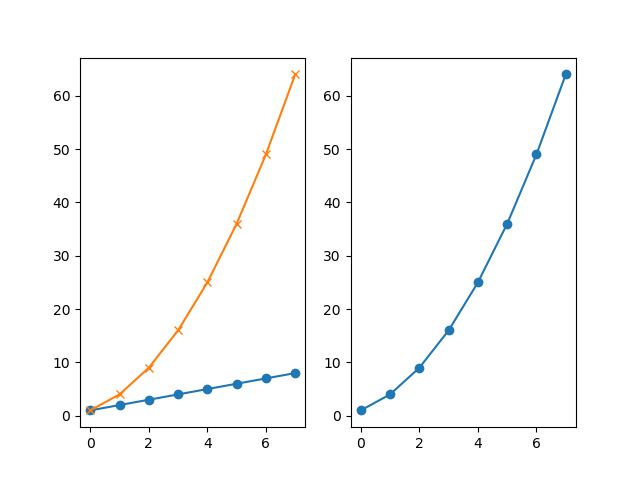

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

We can then call subplot again with the last parameter as a two to plot new data to a plot on the right hand side. 

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

Now we have two plots, each with their own axis objects.

Now the norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. At any time with the parameters that interest you in order to get back a given axis. Here, let's put exponential on the linear graph too. 

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This demonstrates a common problem, it looked like linear had roughly the same area under the line on the chart until we asked matplotlib to put them into one graph. Then the y axis was refreshed. There would be a big problem with misleading the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the share x and share y parameters.

Here's how we could clean this up, we create a new figure. Then created a subplot on the left-hand side store it in AX1.

After plotting that data we create the axis on the right-hand side, and we indicate explicitly we want to share the y-axis. Now we don't have to store the subplot to a variable like we did with AX1. Remember that when you use the scripting interface, pyplot is going to get the current axis object with GCA or get current axis underneath. So a call to pypplot.plot will transparently work with the last axis objects that we're using.

<IPython.core.display.Javascript object>


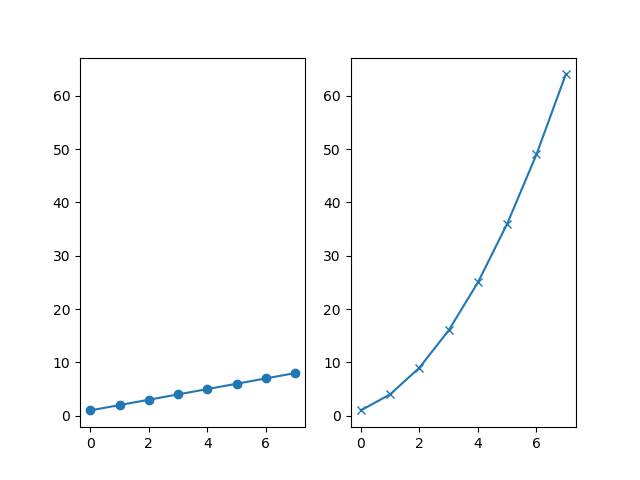

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

Now, you may remember that in the last week's notes, we used the add subplot function. But we didn't pass in three parameters, just one. The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter. Where the hundreds values the first argument, the tens the second argument, and the ones the third argument.

So we will call subplot with three parameters, one, two, and one. And the axis that return should be equal to 1, which is created with the 1 parameter, 121. This is stupid syntax and we should just use the one with the commas.

<IPython.core.display.Javascript object>


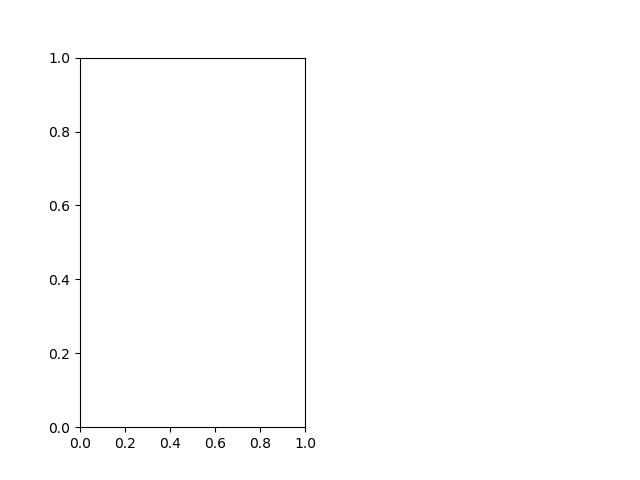

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

In [41]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

An important fact to remember is that the plot location in the matrix of items is indexed starting at one and not at zero, as would be the convention if you were using something like NumPy. So if you're iterating through a matrix or list, create subplots, remember to start at position plus one. Now, there's a nice function called subplots, note the plural, which allows you to get many axis objects at once.

So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this.

<IPython.core.display.Javascript object>


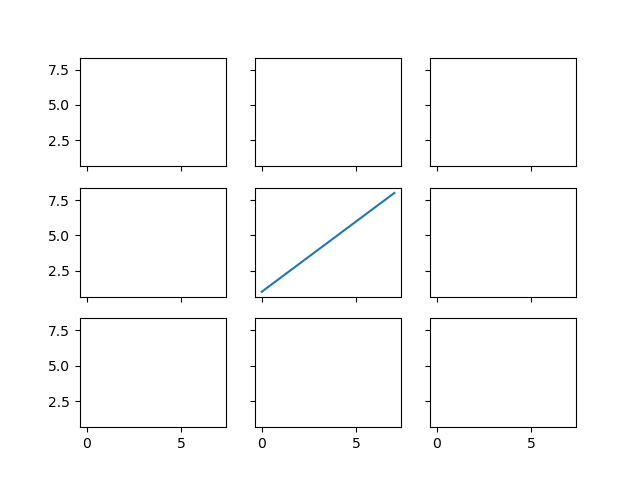

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The syntax looks a little different since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis. Note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure. If you want to turn the labels back on, you need to iterate through the axis objects and do it yourself as below, but it's really unnecessary (especially if you're trying to "save ink" like discussed in previous 

In [8]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [9]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

A histogram is a bar chart which shows the frequency of a given phenomena. A great example are probability distributions. For instance, in the first course in this specialization, we touched on the difference between the random, uniform, normal, and chi squared distributions. Probability function can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur. The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it. Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution.

Let's pull some samples from the normal distribution and plot four different histograms as subplots. First we'll create our 2 x 2 grade of axis objects. In this case, we don't want to share the y-axis between the plots since we're intentionally looking at a number of different sizes of samples.

We're mostly interested in how uniform the distribution looks. Then we can iterate through a list of four different values, 10, 100, 1,000 and 10,000. And we'll pull samples from the NumPy. Remember that the normal function of random just creates a list of numbers based on the underlying normal distribution. We can then plot these to a given axis object using the hist function. And set the title as appropriate.

<IPython.core.display.Javascript object>


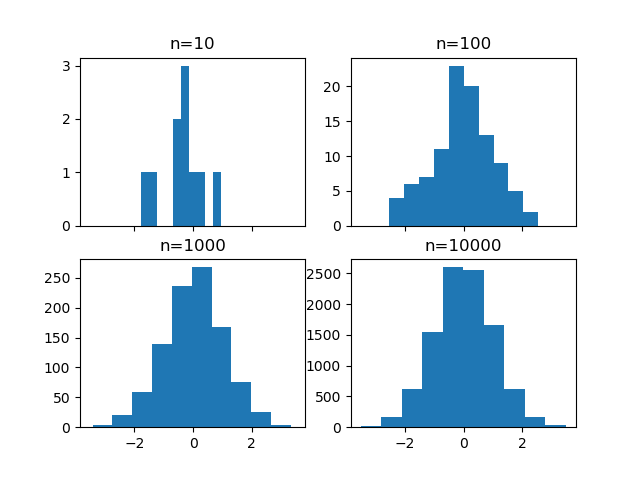

In [10]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

The first plot only has ten samples, so it looks pretty jagged. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples. But if we look closely, we can see that the bar of the 10,000 plots are actually wider than those of the 10 or the 100 plot. What's going on here?

By default, the histogram in Matplotlib uses ten bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin. Let's do the same function with the bin set to 100

<IPython.core.display.Javascript object>


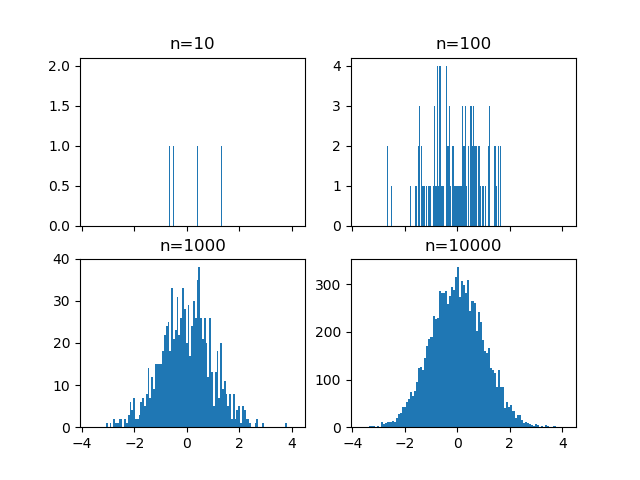

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin. 

Both of these plots are true, one is a visual of the data at a coarse granularity, and one at a more fine grain granularity. When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. This is similar to using aggregate statistics like the mean in standard deviation to describe a sample of a population. These values are coarse and whether they are appropriate depends highly on your questions and interests.

Let's use our newfound knowledge of histograms and subplots to introduce a more flexible GridSpec layout for subplots. The GridSpec allows you to map axes over multiple cells in a grid. For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution. It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear.

<IPython.core.display.Javascript object>


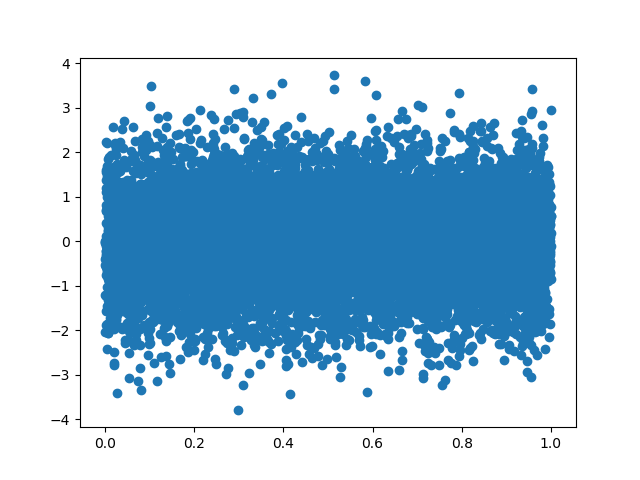

In [12]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

Let's define a 3x3 grid, nine cells in total. We want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side. The original scatter plot can take up a two by two square in the bottom right. 

To use the GridSpec, we first import it, then create a new GridSpec, the overall shape that we want. When we add new items with the subplot, instead of specifying the three numbers of row, column and position, we pass in the elements of the GridSpec object which we wish to cover. And very important here: because we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use slicing for the beginning or ends of lists. 

The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. So we'll create the first subplot and histogram in row 0, covering off the first element, the middle position, and going to the end of the row. We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to the 0 column. Finally we'll create the scatter plot in the lower_right. When we execute this, we see our basic set of plots.

<IPython.core.display.Javascript object>


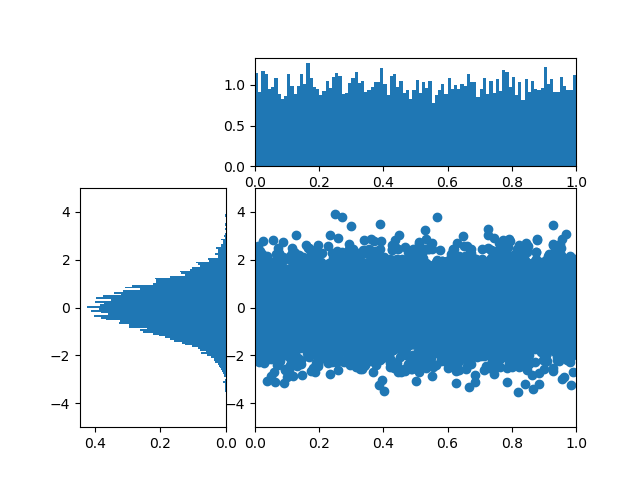

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Now, let's fill this with some data. First the scatter plot, then the top histogram, which is for the x values, then the side histogram for the y values. 

And we want the side histogram to be lined up, so let's rotate the layout by setting the orientation. There are actually a few ways of doing this, but since it's so common, Matplotlib has an orientation parameter which we can set to horizontal.

In [14]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

This is close. We don't really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. Since these are probability density histograms, we care only about the relative values. One handy function of an axes object is that you can clear it. So we don't have to create a new figure and do all the GridSpec work all over again. 

So let's just call the clear function on the two histograms. Then we can call the hist function with the normed=True argument. Which tells Matplotlib to scale the frequency data in the histogram between 0 and 1. Also we can flip the axes of the left-hand side histogram using the invert_xaxis function.

In [15]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


This gives us a rough solution. We can see that the axes values are not aligned. Unfortunately, Matplotlib requires that you share axes when creating plots, and we can't do that post hoc sharing. We can however, set the range of the axis to clear things up a little bit more. And we do this using the axes set_xlim and set_ylim values. I'll just hard code some of these in here to demonstrate.

In [16]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

We can see that our top histogram is random, pretty uniform, and that the histogram for the y values indeed looks like the normal distribution. 

In [17]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

We should know what a box and whisker plot is, if not, google it.

Let's create three different samplings from NumPy. One for the normal distribution. One for random. And one from a gamma distribution. Next, let's put those in a pandas DataFrame. After all, much of the data we would actually process would come from pandas or another data manipulation toolkit and not from NumPy distribution functions.

In [18]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

Now we can use the pandas described function to see some summary statistics about our data frame. 

In [19]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.013183,0.501937,2.006493
std,1.007392,0.288970,1.394983
min,-3.781679,0.000003,0.012627
25%,-0.677340,0.250932,0.980441
50%,-0.018150,0.502410,1.708620
75%,0.663421,0.755605,2.700812
max,3.440293,0.999992,10.705785


Each row has 10,000 entries. The mean values and standard deviation vary heavily. The minimal and maximum values are showing, and there's three different percentage values. These percentage values make up what's called the interquartile range. There are four different quarters of the data. The first is between the minimal value and the first 25% of the data. And this value of 25% is called the first quartile. The second quarter of data is between the 25% mark and the 50% of the data. The third between 50 and 75% of the data. And 75% mark is called the third quartile. And the final piece of data is between the 75% and the maximum of the data....duh. 

Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines which are capped are then drawn out to the minimum and maximum values.

Here's an example. We'll create a new figure. Then we call plt.boxplot, and we pass in the column that we want to visualize. In matplotlib, data needs to conform to NumPy arrays. But pandas is built on top of NumPy data points, so this is as easy as projecting the column that we're interested in. Finally, we set the whis parameter to be the range. This tells the box plot to set the whisker values all the way out to the minimum and maximum values. Also, I am going to assign the output of the box plot function to a variable, which is just an underscore.

<IPython.core.display.Javascript object>


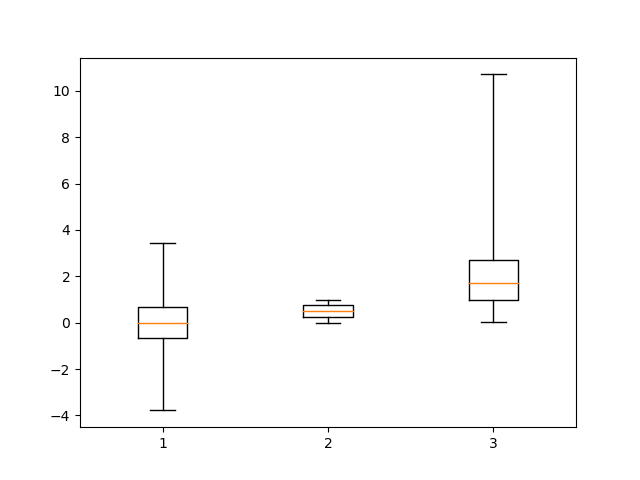

In [20]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

You see, underscore is actually a legal name for a variable on Python. But it's also completely uninformative. It's common practice by some to use an underscore when unpacking values which you don't care about and won't use later. We use it here because if we don't assign the return value of plotting function to a variable, the Jupiter Notebook will assume that we wanted to print that output.

Since plotting functions return a list of all of the artists plotted, this would really muddy up our display. It's up to you whether you want to use this underscore pattern or not in your own code.

Anyway, instead of wasting time talking about using an underscore as a name (why wouldn't you use temp?), let's talk about the box plot. We got it, it's above, and it's easy to understand.

Now let's add the other two samples to it. Unfortunately we can't just pass a whole pandas data frame to matplotlib. Instead we need to pull out each column and send them in as a list of values. 

In [21]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

That gives us our three distributions. Now, we didn't normalize the scale, so that's a little wonky. But if we look at the gamma distribution, for instance, we see the tail of it is very, very long. So the maximum values are very far out.

Let's take a look at this by itself in a histogram.

<IPython.core.display.Javascript object>


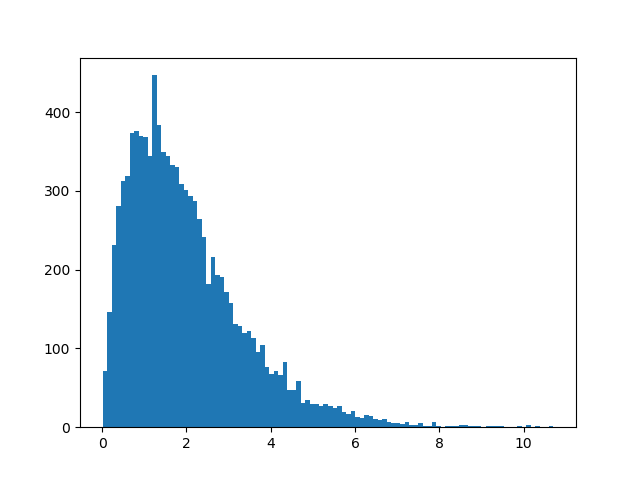

In [22]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

We see it starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail (which you would know if you'd taken statistics courses).

Let's add this to our box plot to demonstrate something called inset axes. Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one axes object. We can actually overlay an axes on top of another within a figure. Now, this functionality isn't in the basic matplotlib space, but it's in the toolkits, which tend to ship with matplotlib. There are several different toolkits available, and while they tend to be packaged, they aren't considered core. The toolkit that we're going to use is called the axes grid, and we import it from the mpl_toolkits.axes_grid1.inset_locator. 

First we create a new figure and we put up our box plot. Then we just call the inset locator and pass it the current axes object we want composition on top of, followed by the size of our new axis. And we can specify this as both a width and a height in percentage from the parent axes. Then we give it a number from the place in which we wanted to drop the new axes.

<IPython.core.display.Javascript object>


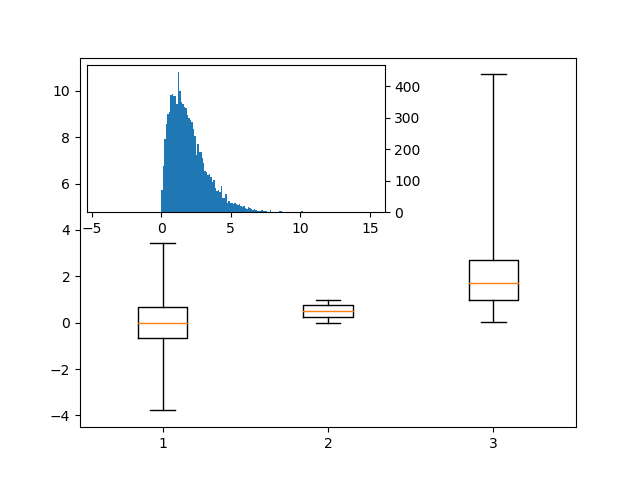

In [23]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

This isn't quite as flexible as with grid spec where we're essentially trying to connect the plot to one of ten different locations. We put in position two here, which will place the axes in the upper left of the figure. Then we just push a histogram to that axes and it behaves as we would expect.

We've a little clash on the yaxis but that's easy enough to flip on the inset plot. We just access the yaxis of the plot and call tick_right. And there we are. An inset plot showing a distribution as a histogram layered on top of a box plot.

In [24]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

Now we have our inset plot showing a distribution as a histogram layered on top of a box plot. Now, the box plot has a few more functions which are worth investigating before we finish.

First, if you don't supply the whis argument, the whiskers actually only go out to halfway between the interquartile range. You can figure that out through the top of the box minus the bottom of the box and times that value by 1.5. This is one method of detecting outliers. And the points which are plotted beyond the whiskers are called fliers. You can see how this method of outlier detection differs with respect to our three distributions.

<IPython.core.display.Javascript object>


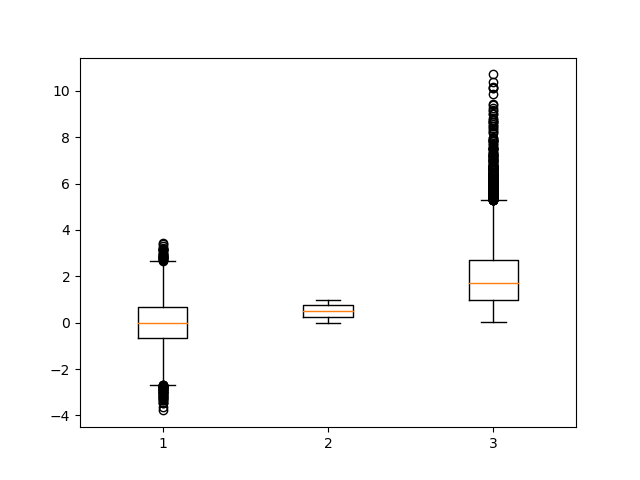

In [25]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

You can also plot the confidence interval in a couple of different ways on the data. The most common is to add notches to the box plot representing the 95% confidence interval of the data and there are lots of other ways to customize the box plot.

# Heatmaps

Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions. Heatmaps are often times overused though in data analytics. The problem is heatmaps are really quite powerful when you have the right data. Weather data is a great example. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity.

In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation. Earlier, we talked about different statistical distributions and they work well for this demonstration. In fact, let's redo our subplots where we showed a scatter plot and two histograms, one for each dimension.

In this we define Y values to come from the normal distribution and X values to come from a random distribution. To plot this as a two-dimensional histogram, we just pass it to the hist2d function. 

<IPython.core.display.Javascript object>


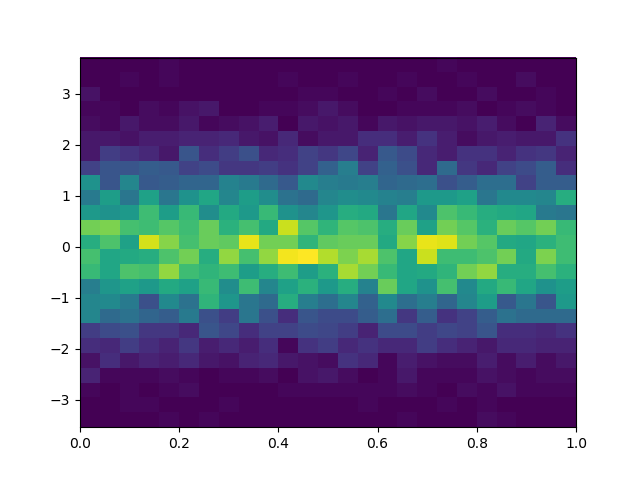

In [26]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

See how the edge colors on the top and the bottom are very dark purple, while there are greens and yellows in the middle horizon of the image. Now we talked a bit about what happens when you increase or decrease the number of bins with regular histograms. But how do you think this changes when using heatmaps? 

<IPython.core.display.Javascript object>


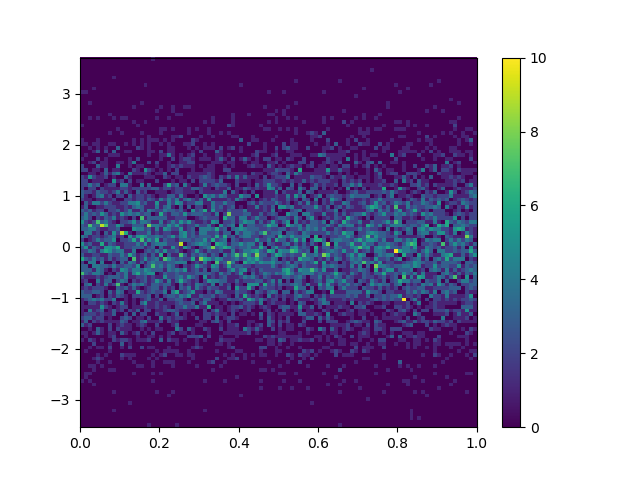

In [27]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

You see, as you increase the bins you get the same effect. Every data point starts to fall into its own category. So you get a more clear picture. But everything eventually is just one color since every data point ends up being unique. 

Now a legend is important and heatmaps are no different. When using the pyplot scripting layer, this is as easy as calling the pyplot colorbar function.

In [28]:
# add a colorbar legend
plt.colorbar()

# Animations

So far we focused on static images, but matplotlib does have some support for both animation and interactivity. Animation and interactivity heavily depend on support from the backend layer. And using a backend like the image png1 doesn't provide this. However, the NBN (???) backend or the matplotlib notebook magic function does provide for some interactivity, so we can leverage that here.

The Maplotlib.animation module contains important helpers for building animations. For our discussion, the important object here is to call FuncAnimation. And it builds an animation by iteratively calling a function which you define. Essentially, your function will either clear the axis object and redraw the next frame, which you want users to see or will return a list of objects which need to be redrawn.

Let's see an example. First, let's import the animation module. Then, let's define a cut-off for our animation.

In [29]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

Next we want to actually create a function which will do the plotting. We'll call this function update. Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this is as the index into our array values, which we called x. 

The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the stop object on the event source object attached to the FuncAnimation object. We're going to call our animation a. So, I'll just use that here. I didn't know we can just drop plot as per normal. So lets first clear the current axis with cla, then create a histogram using a set of value in the x up to the current value. Slicing is great for this. Now we also need to consider the bins. Previously we just passed a single number in for the bins (for example, 10 or 100). But we can also pass in the spacing in between bins. Since we want all of our bins set and evenly spaced, because we're redrawing the animation in each clock tick, we can use the NumPy arange function. This will ensure that the bins don't change. We use the balance of minus 4 to plus 4, in half-step increments.

We also need to set the axis values since otherwise, the histogram will continually autoscale between frames. So I'll just hard code some values here, often the bin sizes and use 30 as a max and a couple of labels and titles to make the chart look a little better.

Finally, let me show you another text function called annotate. This places text at a certain position in the chart and we'll use it to show how many samples are currently being rendered to the screen. 

In [30]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

Now let's just generate a new figure, then call the FuncAnimation constructor and we'll assign this to variable a. The first parameter is the figure that we're working with. This isn't so important here, since we're using the pipe plot scripting interface to manage the figure. Then the name of our function and then the amount of time we want between updates. Let's set this to 100 milliseconds. 

Also, remember that we have to set this to variable a. Otherwise, our function isn't going to know how to stop the animation. 

<IPython.core.display.Javascript object>


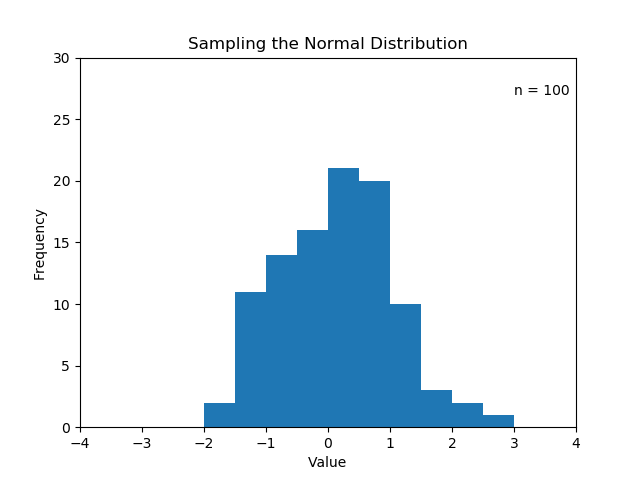

In [36]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

FuncAnimation like most of the other classes in the animation package is a subclass of the animation object. The animation object has a handy save function, which allows you to write the animation to a file. This requires additional third party library such as ffmpeg which can take a bit to install and set up. But the result is that you can fairly easily export your animations directly from the Jupiter Web programming environment. 

A figure animation with four sub-plots, one for each kind of distribution we might be interested in understanding, could be pretty neat. We could plot the samples for the normal distribution in one, for a gamma distribution in another, and then maybe a couple of paramaterized distributions like the normal distribution with different levels of standard deviation. This would be a great way to practice the skills that you've learned in this module, as it would require that you manage multiple sub-plots within an animation using histograms.

# Interactivity

Interactivity and animation are very similar in Matplotlib. For interactivity though, we have to head down to the artist layer a bit more. In particular, we have to reference the canvas object of the current figure. The canvas object handles all of the drawing events and it's tightly connected with a given backend.

If event listening is something you're not familiar with, it can be a bit of a tough concept to grasp. For decades, computers have had abstract methods for doing multiple things at once and now with multiprocessing and multi-core machines, there's actually physical ways to do many thing at once. But even before that, the abstraction news was largely focused on the notion of events.

Moving a mouse pointer for instance would create an event, clicking will create an event, pressing on keys on the keyboard would create an event. And this didn't only happen at the hardware level such as IRQ interrupts but at the software level as well. In fact, event driven programming has infiltrated most of the ways computer programmers regularly engage with software. From HTML and JavaScript, down to lower level C code. You can think of an event as a piece of data which is associated with a function call. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data.

Let's look at a trivial example. We'll create a new figure and plot some random data to it. Then we'll create a new function called onclick. And this takes one parameter, which is the event object. So what's in an event object? That depends on the type of the event. Here we're going to deal with mouse events. And they have both an x and a y value as far as the location of the mouse in pixels on the canvas. As well as an x and a y values first location of the mouse relative to our data and axis. So for our onclick we'll clear the current axis then plot our data then set the title of the plot to be variance location of the mouse. 

Finally, we have to connect this events to an event listener and this process is usually called wiring it up. In this case very easy, get the current figure and its canvas subject then call the mpl_connect function. Passing in the string for button_press_event as well as reference to the function onclick, which will be call when the event is detected.

<IPython.core.display.Javascript object>


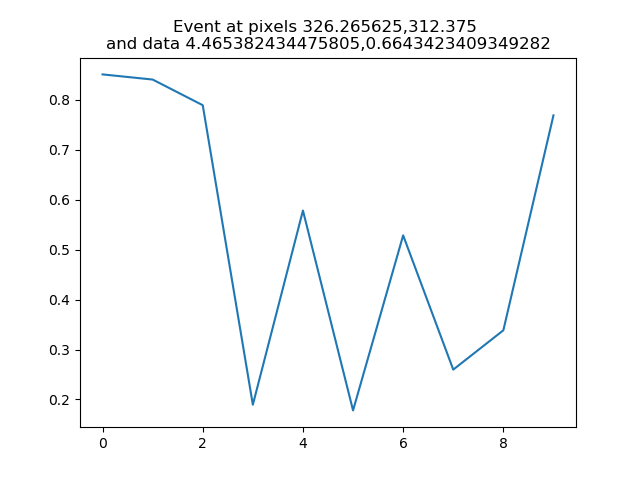

7

In [37]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

Now when we click on our plot we see the most information printed to the title. The Matplotlib documentation describes the kinds of events you can listen from. But whether they work or not, depends on the backend you're using, and some backends are not interactive. Button presses, key presses, scroll events and figuring axis enter and leave events are almost common. But the most important event for us is the pick event. 

The pick event allows you to respond when the user is actually clicked on a visual element in the figure. Let's look at an example. 

For this, I want to create a list of countries in randomized order. We can do this with the shuffle function from the random module. Then I'll create a new DataFrame with random values for height and weight, and another column for origin.

In [38]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.875243,0.814633,Germany
1,0.297001,0.792272,UK
2,0.908107,0.222538,USA
3,0.008538,0.768670,Canada
4,0.800463,0.628602,India
5,0.249741,0.350239,Brazil
6,0.401294,0.787891,Mexico
7,0.137927,0.160860,Iraq
8,0.241459,0.432528,Chile
9,0.012537,0.863602,China


Now we can create a scatterplot with the x and y values as the height and weight respectively, pulling from the data frame. Note that we've added a new argument here called picker and set it to 5. This informs the Matplotlib backend that the mouse doesn't have to click directly on a rendered object that can be up to 5 pixels away and it should find the closest object. What works for you depends on how you're rendering your charts. With axis labeled, let's go render this.

<IPython.core.display.Javascript object>


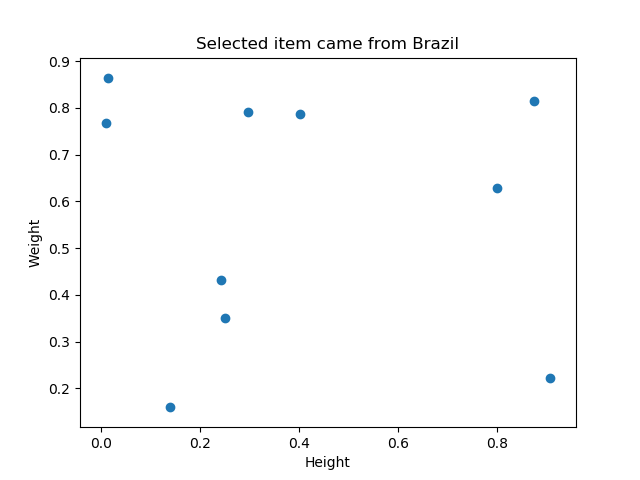

Text(0.5,0,'Height')

In [39]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

Now we'll create a function called onpick, which takes on an event. This event is a pick event which has different data than the most event. In particular, it's got an index value which happens to correspond to our index and the dataframe. Matplotlib isn't aware of the data frame but it renders the data in the same order. So we can use the data frame iloc indexer to pull out the origin information. 

In [40]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

Now you can see that when you click on an item, it renders the origin as we would expect.